In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd

In [53]:
from datetime import datetime
import datetime as dt

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as db
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [55]:
# Inspecting the tables name in the csv data files using the sqlite hawaii
session = Session(bind=engine)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [56]:
# Name and type of variables or characters used in the table 'measurement'
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [57]:
# Name and type of variables or characters used in the table 'station'
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [58]:
# Choose a start date: June 15, 2017 and end date: June 30, 2017 for the trip, with a total of 15 days.
engine.execute("SELECT * FROM measurement WHERE date >= '2017-06-15' AND date <= '2017-06-30'").fetchall()

[(2658, 'USC00519397', '2017-06-15', 0.0, 78.0),
 (2659, 'USC00519397', '2017-06-16', 0.0, 79.0),
 (2660, 'USC00519397', '2017-06-17', 0.0, 80.0),
 (2661, 'USC00519397', '2017-06-18', 0.05, 77.0),
 (2662, 'USC00519397', '2017-06-19', 0.0, 80.0),
 (2663, 'USC00519397', '2017-06-20', 0.02, 78.0),
 (2664, 'USC00519397', '2017-06-21', 0.0, 79.0),
 (2665, 'USC00519397', '2017-06-22', 0.0, 80.0),
 (2666, 'USC00519397', '2017-06-23', 0.0, 78.0),
 (2667, 'USC00519397', '2017-06-24', 0.06, 80.0),
 (2668, 'USC00519397', '2017-06-25', 0.0, 80.0),
 (2669, 'USC00519397', '2017-06-26', 0.0, 81.0),
 (2670, 'USC00519397', '2017-06-27', 0.0, 80.0),
 (2671, 'USC00519397', '2017-06-28', 0.0, 79.0),
 (2672, 'USC00519397', '2017-06-29', 0.0, 79.0),
 (2673, 'USC00519397', '2017-06-30', 0.08, 75.0),
 (5387, 'USC00513117', '2017-06-15', 0.17, 77.0),
 (5388, 'USC00513117', '2017-06-16', 0.02, 76.0),
 (5389, 'USC00513117', '2017-06-17', 0.35, 77.0),
 (5390, 'USC00513117', '2017-06-18', 0.25, 72.0),
 (5391, 'USC

In [59]:
# Reflecting now the Database into a ORM (Object Relational Mapper) 
engine = db.create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()
metadata = db.MetaData()

In [60]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [62]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
Base.metadata.create_all(engine)
c

In [14]:
# To know what columns of information are in the hawaii_stations.csv file
station_list = session.query(Station)
for station in station_list:
    print(f"station:{station.station}, Place:{station.name}, Latitude:{station.latitude},\
    Longitude:{station.longitude}, Elevation:{station.elevation}")

station:USC00519397, Place:WAIKIKI 717.2, HI US, Latitude:21.2716,    Longitude:-157.8168, Elevation:3.0
station:USC00513117, Place:KANEOHE 838.1, HI US, Latitude:21.4234,    Longitude:-157.8015, Elevation:14.6
station:USC00514830, Place:KUALOA RANCH HEADQUARTERS 886.9, HI US, Latitude:21.5213,    Longitude:-157.8374, Elevation:7.0
station:USC00517948, Place:PEARL CITY, HI US, Latitude:21.3934,    Longitude:-157.9751, Elevation:11.9
station:USC00518838, Place:UPPER WAHIAWA 874.3, HI US, Latitude:21.4992,    Longitude:-158.0111, Elevation:306.6
station:USC00519523, Place:WAIMANALO EXPERIMENTAL FARM, HI US, Latitude:21.33556,    Longitude:-157.71139, Elevation:19.5
station:USC00519281, Place:WAIHEE 837.5, HI US, Latitude:21.45167,    Longitude:-157.84888999999998, Elevation:32.9
station:USC00511918, Place:HONOLULU OBSERVATORY 702.2, HI US, Latitude:21.3152,    Longitude:-157.9992, Elevation:0.9
station:USC00516128, Place:MANOA LYON ARBO 785.2, HI US, Latitude:21.3331,    Longitude:-157.8

In [15]:
# To know what columns of information are in the hawaii_measuremts.csv file
measurement_list = session.query(Measurement)
for measure in measurement_list:
    print(f"station:{measure.station}, Date:{measure.date} ,Precipitation: {measure.prcp},TOBS: {measure.tobs}")

station:USC00519397, Date:2010-01-01 ,Precipitation: 0.08,TOBS: 65.0
station:USC00519397, Date:2010-01-02 ,Precipitation: 0.0,TOBS: 63.0
station:USC00519397, Date:2010-01-03 ,Precipitation: 0.0,TOBS: 74.0
station:USC00519397, Date:2010-01-04 ,Precipitation: 0.0,TOBS: 76.0
station:USC00519397, Date:2010-01-06 ,Precipitation: None,TOBS: 73.0
station:USC00519397, Date:2010-01-07 ,Precipitation: 0.06,TOBS: 70.0
station:USC00519397, Date:2010-01-08 ,Precipitation: 0.0,TOBS: 64.0
station:USC00519397, Date:2010-01-09 ,Precipitation: 0.0,TOBS: 68.0
station:USC00519397, Date:2010-01-10 ,Precipitation: 0.0,TOBS: 73.0
station:USC00519397, Date:2010-01-11 ,Precipitation: 0.01,TOBS: 64.0
station:USC00519397, Date:2010-01-12 ,Precipitation: 0.0,TOBS: 61.0
station:USC00519397, Date:2010-01-14 ,Precipitation: 0.0,TOBS: 66.0
station:USC00519397, Date:2010-01-15 ,Precipitation: 0.0,TOBS: 65.0
station:USC00519397, Date:2010-01-16 ,Precipitation: 0.0,TOBS: 68.0
station:USC00519397, Date:2010-01-17 ,Precip

station:USC00519397, Date:2012-08-03 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-04 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-05 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-06 ,Precipitation: 0.0,TOBS: 77.0
station:USC00519397, Date:2012-08-07 ,Precipitation: 0.0,TOBS: 77.0
station:USC00519397, Date:2012-08-08 ,Precipitation: 0.02,TOBS: 78.0
station:USC00519397, Date:2012-08-09 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-10 ,Precipitation: 0.0,TOBS: 76.0
station:USC00519397, Date:2012-08-11 ,Precipitation: 0.0,TOBS: 75.0
station:USC00519397, Date:2012-08-12 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-13 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-14 ,Precipitation: 0.0,TOBS: 77.0
station:USC00519397, Date:2012-08-15 ,Precipitation: 0.01,TOBS: 79.0
station:USC00519397, Date:2012-08-16 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2012-08-17 ,Precipit

station:USC00519397, Date:2016-09-15 ,Precipitation: 0.42,TOBS: 79.0
station:USC00519397, Date:2016-09-16 ,Precipitation: 0.06,TOBS: 80.0
station:USC00519397, Date:2016-09-17 ,Precipitation: 0.05,TOBS: 79.0
station:USC00519397, Date:2016-09-18 ,Precipitation: 0.0,TOBS: 81.0
station:USC00519397, Date:2016-09-19 ,Precipitation: 0.0,TOBS: 77.0
station:USC00519397, Date:2016-09-20 ,Precipitation: 0.0,TOBS: 77.0
station:USC00519397, Date:2016-09-21 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2016-09-22 ,Precipitation: 0.02,TOBS: 76.0
station:USC00519397, Date:2016-09-23 ,Precipitation: 0.0,TOBS: 82.0
station:USC00519397, Date:2016-09-24 ,Precipitation: 0.0,TOBS: 81.0
station:USC00519397, Date:2016-09-25 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519397, Date:2016-09-26 ,Precipitation: 0.06,TOBS: 80.0
station:USC00519397, Date:2016-09-27 ,Precipitation: 0.02,TOBS: 80.0
station:USC00519397, Date:2016-09-28 ,Precipitation: 0.0,TOBS: 79.0
station:USC00519397, Date:2016-09-29 ,Prec

station:USC00513117, Date:2013-03-30 ,Precipitation: 0.05,TOBS: 69.0
station:USC00513117, Date:2013-03-31 ,Precipitation: 0.02,TOBS: 64.0
station:USC00513117, Date:2013-04-01 ,Precipitation: 0.0,TOBS: 63.0
station:USC00513117, Date:2013-04-02 ,Precipitation: 0.0,TOBS: 63.0
station:USC00513117, Date:2013-04-03 ,Precipitation: 0.02,TOBS: 64.0
station:USC00513117, Date:2013-04-04 ,Precipitation: 0.07,TOBS: 65.0
station:USC00513117, Date:2013-04-05 ,Precipitation: 0.0,TOBS: 70.0
station:USC00513117, Date:2013-04-06 ,Precipitation: 0.0,TOBS: 72.0
station:USC00513117, Date:2013-04-07 ,Precipitation: 0.01,TOBS: 73.0
station:USC00513117, Date:2013-04-08 ,Precipitation: 0.0,TOBS: 71.0
station:USC00513117, Date:2013-04-09 ,Precipitation: 0.02,TOBS: 71.0
station:USC00513117, Date:2013-04-10 ,Precipitation: 0.03,TOBS: 71.0
station:USC00513117, Date:2013-04-11 ,Precipitation: 0.01,TOBS: 68.0
station:USC00513117, Date:2013-04-12 ,Precipitation: 0.0,TOBS: 73.0
station:USC00513117, Date:2013-04-13 ,Pr

station:USC00513117, Date:2017-06-14 ,Precipitation: 0.27,TOBS: 76.0
station:USC00513117, Date:2017-06-15 ,Precipitation: 0.17,TOBS: 77.0
station:USC00513117, Date:2017-06-16 ,Precipitation: 0.02,TOBS: 76.0
station:USC00513117, Date:2017-06-17 ,Precipitation: 0.35,TOBS: 77.0
station:USC00513117, Date:2017-06-18 ,Precipitation: 0.25,TOBS: 72.0
station:USC00513117, Date:2017-06-19 ,Precipitation: 0.05,TOBS: 77.0
station:USC00513117, Date:2017-06-20 ,Precipitation: 0.05,TOBS: 75.0
station:USC00513117, Date:2017-06-21 ,Precipitation: 0.02,TOBS: 82.0
station:USC00513117, Date:2017-06-22 ,Precipitation: 0.1,TOBS: 77.0
station:USC00513117, Date:2017-06-23 ,Precipitation: 0.0,TOBS: 76.0
station:USC00513117, Date:2017-06-24 ,Precipitation: 0.0,TOBS: 74.0
station:USC00513117, Date:2017-06-25 ,Precipitation: 0.08,TOBS: 73.0
station:USC00513117, Date:2017-06-26 ,Precipitation: 0.02,TOBS: 77.0
station:USC00513117, Date:2017-06-27 ,Precipitation: 0.0,TOBS: 77.0
station:USC00513117, Date:2017-06-28 ,

station:USC00514830, Date:2015-03-19 ,Precipitation: 0.0,TOBS: 70.0
station:USC00514830, Date:2015-03-20 ,Precipitation: 0.02,TOBS: 72.0
station:USC00514830, Date:2015-03-22 ,Precipitation: None,TOBS: 77.0
station:USC00514830, Date:2015-03-23 ,Precipitation: 0.0,TOBS: 76.0
station:USC00514830, Date:2015-03-24 ,Precipitation: 0.13,TOBS: 75.0
station:USC00514830, Date:2015-03-25 ,Precipitation: 0.08,TOBS: 75.0
station:USC00514830, Date:2015-03-26 ,Precipitation: 0.05,TOBS: 71.0
station:USC00514830, Date:2015-03-29 ,Precipitation: None,TOBS: 74.0
station:USC00514830, Date:2015-03-30 ,Precipitation: 0.14,TOBS: 76.0
station:USC00514830, Date:2015-03-31 ,Precipitation: 0.35,TOBS: 77.0
station:USC00514830, Date:2015-04-01 ,Precipitation: 0.03,TOBS: 75.0
station:USC00514830, Date:2015-04-02 ,Precipitation: 0.0,TOBS: 75.0
station:USC00514830, Date:2015-04-03 ,Precipitation: 0.0,TOBS: 77.0
station:USC00514830, Date:2015-04-05 ,Precipitation: None,TOBS: 77.0
station:USC00514830, Date:2015-04-06 ,

station:USC00517948, Date:2014-04-16 ,Precipitation: 0.06,TOBS: 74.0
station:USC00517948, Date:2014-04-17 ,Precipitation: None,TOBS: 74.0
station:USC00517948, Date:2014-04-21 ,Precipitation: None,TOBS: 75.0
station:USC00517948, Date:2014-04-22 ,Precipitation: 0.09,TOBS: 77.0
station:USC00517948, Date:2014-04-23 ,Precipitation: 0.0,TOBS: 77.0
station:USC00517948, Date:2014-04-24 ,Precipitation: 0.0,TOBS: 76.0
station:USC00517948, Date:2014-04-28 ,Precipitation: None,TOBS: 74.0
station:USC00517948, Date:2014-04-29 ,Precipitation: None,TOBS: 74.0
station:USC00517948, Date:2014-05-02 ,Precipitation: 0.0,TOBS: 78.0
station:USC00517948, Date:2014-05-05 ,Precipitation: None,TOBS: 79.0
station:USC00517948, Date:2014-05-06 ,Precipitation: 0.72,TOBS: 76.0
station:USC00517948, Date:2014-05-07 ,Precipitation: 0.03,TOBS: 76.0
station:USC00517948, Date:2014-05-08 ,Precipitation: None,TOBS: 77.0
station:USC00517948, Date:2014-05-09 ,Precipitation: None,TOBS: 77.0
station:USC00517948, Date:2014-05-12 

station:USC00519523, Date:2011-01-04 ,Precipitation: 0.0,TOBS: 73.0
station:USC00519523, Date:2011-01-05 ,Precipitation: 0.0,TOBS: 62.0
station:USC00519523, Date:2011-01-06 ,Precipitation: 0.15,TOBS: 68.0
station:USC00519523, Date:2011-01-07 ,Precipitation: 0.02,TOBS: 66.0
station:USC00519523, Date:2011-01-08 ,Precipitation: 0.0,TOBS: 73.0
station:USC00519523, Date:2011-01-09 ,Precipitation: 0.0,TOBS: 73.0
station:USC00519523, Date:2011-01-10 ,Precipitation: 0.0,TOBS: 73.0
station:USC00519523, Date:2011-01-11 ,Precipitation: 0.43,TOBS: 58.0
station:USC00519523, Date:2011-01-12 ,Precipitation: 1.34,TOBS: 71.0
station:USC00519523, Date:2011-01-13 ,Precipitation: 3.62,TOBS: 70.0
station:USC00519523, Date:2011-01-14 ,Precipitation: 0.1,TOBS: 76.0
station:USC00519523, Date:2011-01-15 ,Precipitation: 0.0,TOBS: 66.0
station:USC00519523, Date:2011-01-16 ,Precipitation: 0.0,TOBS: 70.0
station:USC00519523, Date:2011-01-17 ,Precipitation: 0.19,TOBS: 70.0
station:USC00519523, Date:2011-01-18 ,Prec

station:USC00519523, Date:2016-09-26 ,Precipitation: 0.34,TOBS: 78.0
station:USC00519523, Date:2016-09-27 ,Precipitation: 0.05,TOBS: 78.0
station:USC00519523, Date:2016-09-28 ,Precipitation: 0.0,TOBS: 78.0
station:USC00519523, Date:2016-09-29 ,Precipitation: 0.18,TOBS: 82.0
station:USC00519523, Date:2016-09-30 ,Precipitation: 0.15,TOBS: 78.0
station:USC00519523, Date:2016-10-01 ,Precipitation: 0.07,TOBS: 79.0
station:USC00519523, Date:2016-10-02 ,Precipitation: 0.0,TOBS: 81.0
station:USC00519523, Date:2016-10-03 ,Precipitation: 0.0,TOBS: 79.0
station:USC00519523, Date:2016-10-04 ,Precipitation: 0.0,TOBS: 80.0
station:USC00519523, Date:2016-10-05 ,Precipitation: 0.0,TOBS: 80.0
station:USC00519523, Date:2016-10-06 ,Precipitation: 0.0,TOBS: 80.0
station:USC00519523, Date:2016-10-07 ,Precipitation: 0.0,TOBS: 79.0
station:USC00519523, Date:2016-10-08 ,Precipitation: 0.0,TOBS: 82.0
station:USC00519523, Date:2016-10-09 ,Precipitation: 0.0,TOBS: 80.0
station:USC00519523, Date:2016-10-10 ,Preci

station:USC00519281, Date:2013-04-15 ,Precipitation: 0.79,TOBS: 70.0
station:USC00519281, Date:2013-04-16 ,Precipitation: 0.12,TOBS: 63.0
station:USC00519281, Date:2013-04-17 ,Precipitation: 0.0,TOBS: 70.0
station:USC00519281, Date:2013-04-18 ,Precipitation: 0.02,TOBS: 71.0
station:USC00519281, Date:2013-04-19 ,Precipitation: 0.13,TOBS: 72.0
station:USC00519281, Date:2013-04-20 ,Precipitation: 0.59,TOBS: 68.0
station:USC00519281, Date:2013-04-21 ,Precipitation: 0.01,TOBS: 76.0
station:USC00519281, Date:2013-04-22 ,Precipitation: 0.41,TOBS: 70.0
station:USC00519281, Date:2013-04-23 ,Precipitation: 0.08,TOBS: 74.0
station:USC00519281, Date:2013-04-24 ,Precipitation: 1.39,TOBS: 68.0
station:USC00519281, Date:2013-04-25 ,Precipitation: 0.98,TOBS: 71.0
station:USC00519281, Date:2013-04-26 ,Precipitation: 0.01,TOBS: 71.0
station:USC00519281, Date:2013-04-27 ,Precipitation: 0.0,TOBS: 75.0
station:USC00519281, Date:2013-04-28 ,Precipitation: 0.0,TOBS: 79.0
station:USC00519281, Date:2013-04-29 

station:USC00519281, Date:2017-05-25 ,Precipitation: 0.2,TOBS: 74.0
station:USC00519281, Date:2017-05-26 ,Precipitation: 0.0,TOBS: 74.0
station:USC00519281, Date:2017-05-27 ,Precipitation: 0.0,TOBS: 74.0
station:USC00519281, Date:2017-05-28 ,Precipitation: 0.08,TOBS: 80.0
station:USC00519281, Date:2017-05-29 ,Precipitation: 0.4,TOBS: 74.0
station:USC00519281, Date:2017-05-30 ,Precipitation: 1.12,TOBS: 72.0
station:USC00519281, Date:2017-05-31 ,Precipitation: 0.25,TOBS: 75.0
station:USC00519281, Date:2017-06-01 ,Precipitation: 0.0,TOBS: 80.0
station:USC00519281, Date:2017-06-02 ,Precipitation: 0.09,TOBS: 76.0
station:USC00519281, Date:2017-06-03 ,Precipitation: 0.08,TOBS: 76.0
station:USC00519281, Date:2017-06-04 ,Precipitation: 0.13,TOBS: 77.0
station:USC00519281, Date:2017-06-05 ,Precipitation: 0.05,TOBS: 75.0
station:USC00519281, Date:2017-06-06 ,Precipitation: 0.0,TOBS: 75.0
station:USC00519281, Date:2017-06-07 ,Precipitation: 0.0,TOBS: 75.0
station:USC00519281, Date:2017-06-08 ,Pre

station:USC00511918, Date:2015-07-10 ,Precipitation: 0.0,TOBS: 73.0
station:USC00511918, Date:2015-07-13 ,Precipitation: None,TOBS: 77.0
station:USC00511918, Date:2015-07-14 ,Precipitation: 0.0,TOBS: 75.0
station:USC00511918, Date:2015-07-15 ,Precipitation: 0.0,TOBS: 71.0
station:USC00511918, Date:2015-07-16 ,Precipitation: 0.0,TOBS: 75.0
station:USC00511918, Date:2015-07-17 ,Precipitation: 0.0,TOBS: 75.0
station:USC00511918, Date:2015-07-21 ,Precipitation: None,TOBS: 72.0
station:USC00511918, Date:2015-07-22 ,Precipitation: 0.0,TOBS: 77.0
station:USC00511918, Date:2015-07-23 ,Precipitation: 0.0,TOBS: 71.0
station:USC00511918, Date:2015-07-24 ,Precipitation: 0.0,TOBS: 77.0
station:USC00511918, Date:2015-07-27 ,Precipitation: None,TOBS: 72.0
station:USC00511918, Date:2015-07-28 ,Precipitation: 0.0,TOBS: 74.0
station:USC00511918, Date:2015-07-30 ,Precipitation: None,TOBS: 78.0
station:USC00511918, Date:2015-07-31 ,Precipitation: 0.0,TOBS: 82.0
station:USC00511918, Date:2015-08-03 ,Precip

station:USC00516128, Date:2014-03-08 ,Precipitation: 0.78,TOBS: 65.0
station:USC00516128, Date:2014-03-09 ,Precipitation: 3.4,TOBS: 68.0
station:USC00516128, Date:2014-03-10 ,Precipitation: 2.14,TOBS: 68.0
station:USC00516128, Date:2014-03-11 ,Precipitation: 0.02,TOBS: 69.0
station:USC00516128, Date:2014-03-12 ,Precipitation: 0.01,TOBS: 70.0
station:USC00516128, Date:2014-03-13 ,Precipitation: 0.02,TOBS: 70.0
station:USC00516128, Date:2014-03-15 ,Precipitation: None,TOBS: 70.0
station:USC00516128, Date:2014-03-16 ,Precipitation: 0.49,TOBS: 66.0
station:USC00516128, Date:2014-03-23 ,Precipitation: None,TOBS: 70.0
station:USC00516128, Date:2014-03-25 ,Precipitation: None,TOBS: 70.0
station:USC00516128, Date:2014-03-26 ,Precipitation: 1.47,TOBS: 77.0
station:USC00516128, Date:2014-03-27 ,Precipitation: 0.39,TOBS: 69.0
station:USC00516128, Date:2014-03-28 ,Precipitation: 0.36,TOBS: 71.0
station:USC00516128, Date:2014-03-29 ,Precipitation: 1.48,TOBS: 70.0
station:USC00516128, Date:2014-03-3

In [16]:
# PRECIPITATION ANALYSIS: Precipitation icludes drizzle, RAIN, sleet and occurs when a portion of the
# atmosphere becomes saturated with water vapor, condensate and "precipitate" (Wikipedia), precipitation 
# is measured in mm (milimeters, where 1 mm = 1 liter per metre squared).

In [17]:
# Calculate the date 1 year ago from the last data point in the database
# the last date is Aug 23, 2017 then a year prior date is Aug 23, 2016 ordering by date
One_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

In [18]:
# Load the query result into a Pandas DataFrame and set the index to the date column
df_One_year_precipitation = pd.DataFrame(data=One_year_precipitation)

In [19]:
# Data review in DataFrame
Precipitation = df_One_year_precipitation
Precipitation.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [20]:
Precipitation.dtypes

date     object
prcp    float64
dtype: object

In [21]:
Precipitation['date'] = pd.to_datetime(Precipitation.date)

In [22]:
Precipitation.dtypes

date    datetime64[ns]
prcp           float64
dtype: object

In [23]:
# Set the index to the date column
Precipitation.set_index('date', inplace=True)
Precipitation.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [24]:
# Rename column prcp for precipitation and eliminate NaN row of data
Precipitation.rename(columns={'prcp':'precipitation'}, inplace=True)
Clean_rain = Precipitation.dropna()

In [25]:
Clean_rain.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [26]:
print(Clean_rain.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2021 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
precipitation    2021 non-null float64
dtypes: float64(1)
memory usage: 31.6 KB
None


In [27]:
# Calculating the monthly average for precipitation
Monthly_precipitation = Clean_rain.groupby([Clean_rain.index.month])['precipitation'].mean()

In [28]:
# Setting up the Monthly Precipitation data as DataFrame
Monthly_precipitation = pd.DataFrame(data = Monthly_precipitation)

In [29]:
Monthly_precipitation

,precipitation
date,
1,0.070294
2,0.241111
3,0.175266
4,0.321111
5,0.151317
6,0.120000
7,0.134773
8,0.193955
9,0.285549


In [30]:
# What type of information in the dataframe: Monthly Precipitation
Monthly_precipitation.dtypes

precipitation    float64
dtype: object

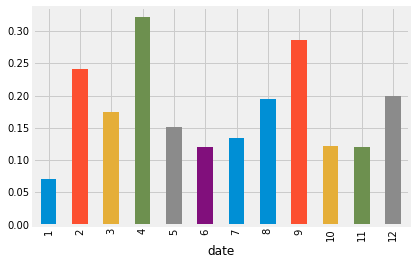

In [31]:
# Graph of the mean per month of the time series
Clean_rain.groupby([Clean_rain.index.month])['precipitation'].mean().plot(kind='bar')

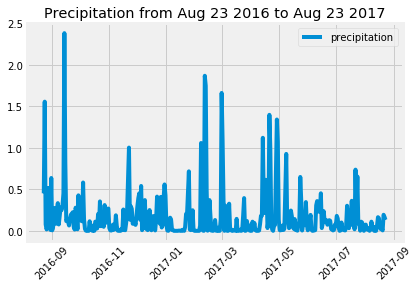

In [32]:
# Graph of a Time Series Precipitation in Hawaii per a year, average per day across the hawaiian weather stations.
Clean_rain.groupby([Clean_rain.index.date])['precipitation'].mean().\
plot(title='Precipitation from Aug 23 2016 to Aug 23 2017',\
     label="precipitation",rot=45)
plt.legend(loc="upper right")

In [33]:
# General statistics for the precipitation data. Adding all precipitation values in the 
# data frame with a count of 2021.00, the yearly average of 0.1772 mm, based on the standard
# deviation value of 0.46 vs the mean of 0.17 we can see that 100x0.46/abs(0.177)= 247 meaning
# that the data in the tables is wide spread, not clustered around the mean. Then 25% of the data
# is zero, fifty percent of the data with a precipitation of around 0.02, 75 percent of the data
# around a 0.13 precipitation with a max scatter value of 6.7 mm of precipitation (highly humid
# and rain)
Clean_rain.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
# STATION ANALYSIS

In [35]:
# Calculating the number of stations, querying the Measurement data, group by station and
# obtaining a list with the information, calculating the length of the list.
number_stations= session.query(Measurement.station).\
        group_by(Measurement.station).all()
total_stations = len(number_stations)
print(f"The number of stations are: {total_stations}")

The number of stations are: 9


In [36]:
# To know the number of activities a sation had during the data collection, the table
# measurement was grouped by station, counting the number of stations used (repited)
# order by station in descendent number of activity registered.
data_station=session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [37]:
print(f"List of stations activities, orderer by the hightest: {data_station}")

List of stations activities, orderer by the hightest: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [38]:
# Once the data is organized extracted the data by position.
print(f"Station with the highest activity:  {data_station[0][0]}")

Station with the highest activity:  USC00519281


In [39]:
# Let's analyze the full table to register which actitivies where taken place
# in station USC00519281.
engine.execute("SELECT * FROM measurement WHERE station == 'USC00519281'").fetchall()

[(12188, 'USC00519281', '2010-01-01', 0.15, 70.0),
 (12189, 'USC00519281', '2010-01-02', 0.0, 62.0),
 (12190, 'USC00519281', '2010-01-03', 0.0, 74.0),
 (12191, 'USC00519281', '2010-01-04', 0.0, 75.0),
 (12192, 'USC00519281', '2010-01-05', 0.0, 74.0),
 (12193, 'USC00519281', '2010-01-06', 0.01, 76.0),
 (12194, 'USC00519281', '2010-01-07', 0.17, 69.0),
 (12195, 'USC00519281', '2010-01-08', 0.0, 66.0),
 (12196, 'USC00519281', '2010-01-09', 0.0, 70.0),
 (12197, 'USC00519281', '2010-01-10', 0.0, 75.0),
 (12198, 'USC00519281', '2010-01-11', 0.03, 64.0),
 (12199, 'USC00519281', '2010-01-12', 0.0, 60.0),
 (12200, 'USC00519281', '2010-01-13', 0.0, 61.0),
 (12201, 'USC00519281', '2010-01-14', 0.0, 68.0),
 (12202, 'USC00519281', '2010-01-15', 0.0, 64.0),
 (12203, 'USC00519281', '2010-01-16', 0.0, 66.0),
 (12204, 'USC00519281', '2010-01-17', 0.0, 67.0),
 (12205, 'USC00519281', '2010-01-18', 0.0, 70.0),
 (12206, 'USC00519281', '2010-01-19', 0.0, 67.0),
 (12207, 'USC00519281', '2010-01-20', 0.0, 67.

In [40]:
# Quering the extreme temperature changes register by station USC00519281 with the 
# highest activity registered.
temp_changes= session.query(func.max(Measurement.tobs),\
              func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

In [41]:
print(f"For station USC00519281, the minimum temperature change was {temp_changes[0][0]} F,\
the maximum temperature register by the station was {temp_changes[0][1]} F, and the averange\
temperature {round(temp_changes[0][2],2)} F.")

For station USC00519281, the minimum temperature change was 85.0 F,the maximum temperature register by the station was 54.0 F, and the averangetemperature 71.66 F.


In [84]:
# Selecting the highest temperature changes in a time-lapse of ta year:
# the last date is Aug 23, 2017 then a year prior date is Aug 23, 2016 ordering by date
Station_temp = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').\
order_by(func.count(Measurement.station).desc()).group_by(Measurement.tobs).all()

In [85]:
print(f"In the year selected the station with major changes based\
on temperature activity is: {Station_temp[0][0]}")

In the year selected the station with major changes basedon temperature activity is: USC00519397


In [86]:
One_year_temperature = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').\
order_by(Measurement.date).filter(Measurement.station == 'USC00519397').all()

In [87]:
# Load the query result into a Pandas DataFrame and set the index to the date column
df_One_year_temperature = pd.DataFrame(data=One_year_temperature)

In [88]:
# Data review in DataFrame
Temperature = df_One_year_temperature
Temperature.head()

,date,tobs
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0


In [89]:
# The column date is an object based on the dtypes inpection
Temperature.dtypes

date     object
tobs    float64
dtype: object

In [90]:
# Passing the date column from objet to a seriestime data
Temperature['date'] = pd.to_datetime(Temperature.date)

In [91]:
# Review if the date from object to datetime was done:
Temperature.dtypes

date    datetime64[ns]
tobs           float64
dtype: object

In [92]:
# Set the index to the date column
Temperature.set_index('date', inplace=True)
Temperature.head()

,tobs
date,
2016-08-23,81.0
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0


In [93]:
# Rename column tobs for temperature and eliminate NaN row of data if any
Temperature.rename(columns={'tobs':'temperature'}, inplace=True)
Clean_temp = Temperature.dropna()

In [94]:
Clean_temp.head()

,temperature
date,
2016-08-23,81.0
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0


In [95]:
print(Clean_temp.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
temperature    361 non-null float64
dtypes: float64(1)
memory usage: 5.6 KB
None


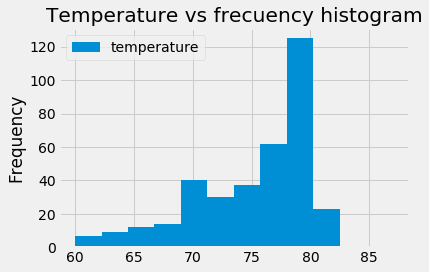

In [96]:
Clean_temp.plot.hist(bins=12, title='Temperature vs frecuency histogram')
plt.tight_layout()
plt.savefig('Temperature changes.png')
plt.show()

In [97]:
### Temperature Analysis

In [100]:
# writing the function 'cal_temps'

def calc_temps(start_date, end_date):

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs),\
                    func.max(Measurement.tobs)).filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).all()

print(calc_temps('2017-06-15','2017-06-30'))

[(71.0, 77.01980198019803, 82.0)]


In [101]:
# Passing 'cal_temp' into a dataframe.

minmax_temp = calc_temps('2017-06-15','2017-06-30')
df_minmax_temp = pd.DataFrame(minmax_temp, columns=['TMIN','TAVE','TMAX'])
df_minmax_temp

,TMIN,TAVE,TMAX
0,71.0,77.019802,82.0


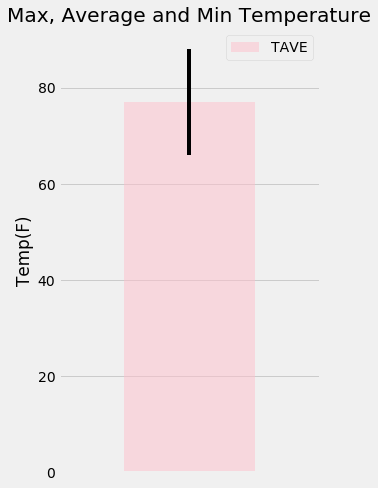

In [103]:
# Ploting as a bar chart, where the y=height is the TAVE,peak-to-peak=(TMAX-TMIN)
# as the yerr (error in y)

df_minmax_temp.plot.bar(y='TAVE', yerr=(df_minmax_temp['TMAX']- df_minmax_temp['TMIN']),\
                                       title= 'Max, Average and Min Temperature',\
                                       color='pink', alpha=0.5, figsize=(5,7))
plt.xticks(np.arange(1,1.0))
plt.ylabel("Temp(F)")
plt.tight_layout()
plt.savefig("Temperature minmax.png")
plt.show()

In [118]:
# Calculate the rainfall per weather station using the previous year's matching dates

def rainfall(start_date, end_date):
    
    precipitation = [Measurement.station,
                   Station.name,
                   Station.latitude,
                   Station.longitude,
                   Station.elevation,
                   Measurement.prcp]


    return session.query(*precipitation).filter(Measurement.station == Station.station).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()


print(rainfall('2016-08-23','2017-08-23'))

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.79), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.7), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.15), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.05), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.02), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


In [121]:
# Daily Normals = average(TMIN,TMAX,TAVE)
# Create a function 'Daily_normals' to calculate for a specific date, in format %m-%d

def Daily_normals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query (*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

print(Daily_normals("08-01"))    

[(67.0, 75.54, 83.0)]


In [151]:
# obtaining dates from trip and matching with dates in data collected.
# Trip dates:
start_date= '2017-06-15'
end_date= '2017-06-30'

# List to collect the days in the trip
Date_range=[]

# Filtering to obtain
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).group_by(Measurement.date).all()

for x in dates:
    Date_range.append(x[0])
    
print(Date_range)

['2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30']


In [153]:
# Reducing dates to %m-%d format
Month_day = [x[5:] for x in Date_range]
print(Month_day)

['06-15', '06-16', '06-17', '06-18', '06-19', '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30']


In [201]:
# Processing the Daily Normals per each day during the trip, to obtain the temperature range as Minimum, Max and Avg.
Trip_dailynormals=[]
for x in Month_day:
    array = np.array(Daily_normals(x)[0])
    print(array)
    Trip_dailynormals.append(array)

[67.         75.40350877 81.        ]
[69.        75.4137931 81.       ]
[68.         74.59322034 81.        ]
[69.         74.60344828 80.        ]
[70.         75.44067797 82.        ]
[68.         73.96491228 85.        ]
[68.         74.75862069 82.        ]
[69.         75.15789474 81.        ]
[68.         74.54385965 80.        ]
[68.         74.96428571 84.        ]
[68.         74.10344828 80.        ]
[67.         74.21428571 82.        ]
[66.         75.01785714 81.        ]
[69.         74.88679245 80.        ]
[67.         74.91525424 80.        ]
[67.         75.59615385 81.        ]


In [205]:
# passin the array into a dataframe for the daily normals
df_Trip_dailynormals=pd.DataFrame(Trip_dailynormals, columns=['tmin','tave','tmax'])

In [206]:
df_Trip_dailynormals.head()

,tmin,tave,tmax
0,67.0,75.403509,81.0
1,69.0,75.413793,81.0
2,68.0,74.593220,81.0
3,69.0,74.603448,80.0
4,70.0,75.440678,82.0


In [211]:
# Adding date column to our data table
Daily_normals_date=pd.Series(Date_range)
df_Trip_dailynormals['date']=Daily_normals_date.values

In [212]:
df_Trip_dailynormals.head()

,tmin,tave,tmax,date
0,67.0,75.403509,81.0,2017-06-15
1,69.0,75.413793,81.0,2017-06-16
2,68.0,74.593220,81.0,2017-06-17
3,69.0,74.603448,80.0,2017-06-18
4,70.0,75.440678,82.0,2017-06-19


In [213]:
#setting a date column as index
df_Trip_dailynormals.set_index('date', inplace=True)

In [214]:
df_Trip_dailynormals.head()

,tmin,tave,tmax
date,,,
2017-06-15,67.0,75.403509,81.0
2017-06-16,69.0,75.413793,81.0
2017-06-17,68.0,74.593220,81.0
2017-06-18,69.0,74.603448,80.0
2017-06-19,70.0,75.440678,82.0


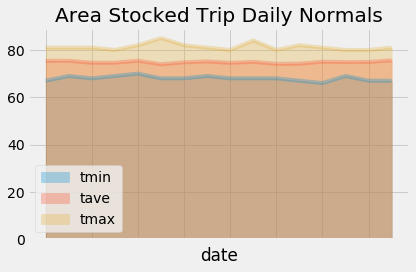

In [249]:
# Plot as stacked area map of the temperature max, min, and average during the trip.
df_Trip_dailynormals.plot(kind='area', alpha=0.3, stacked=False, title='Area Stocked Trip Daily Normals')
plt.tight_layout()
plt.savefig('Daily_Normals.png')
plt.show()